In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#phase2 libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:

df = pd.read_csv('/content/breast_cancer_diagnosis.csv')


In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# **`Check for null values`**



In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [ ]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

<ipython-input-171-316abd6442bd>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue='diagnosis', fill=True, common_norm=False, alpha=0.5, palette='colorblind')


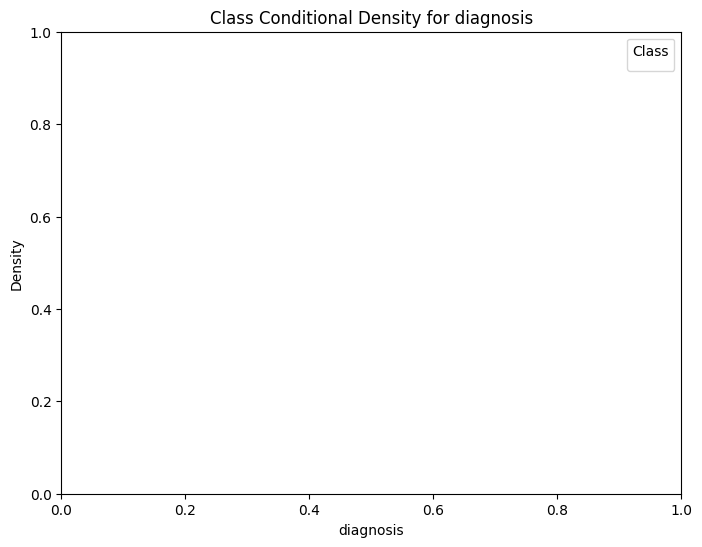

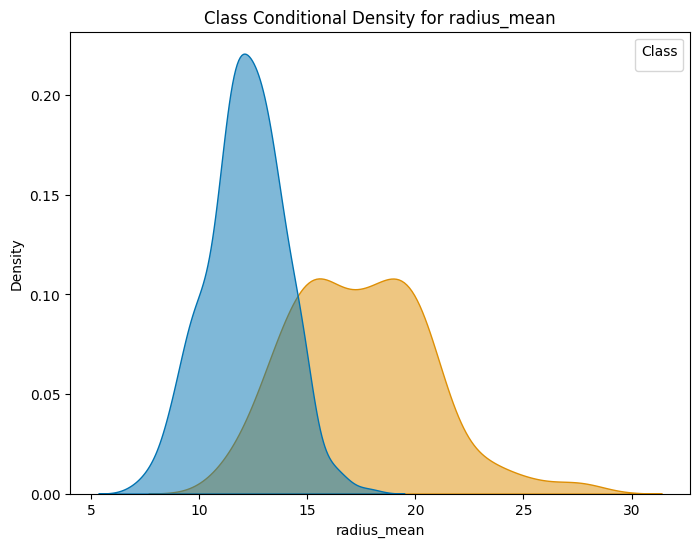

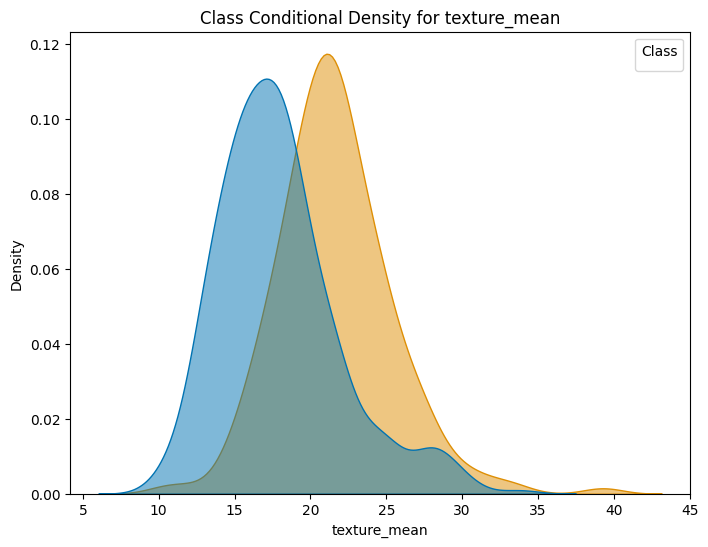

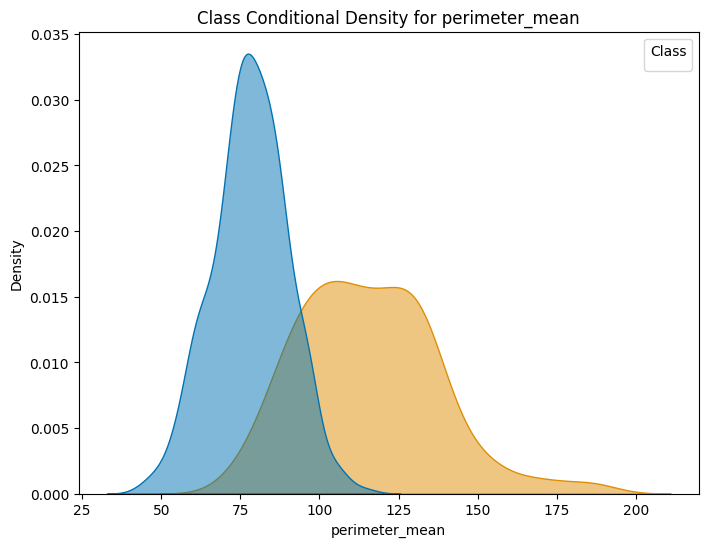

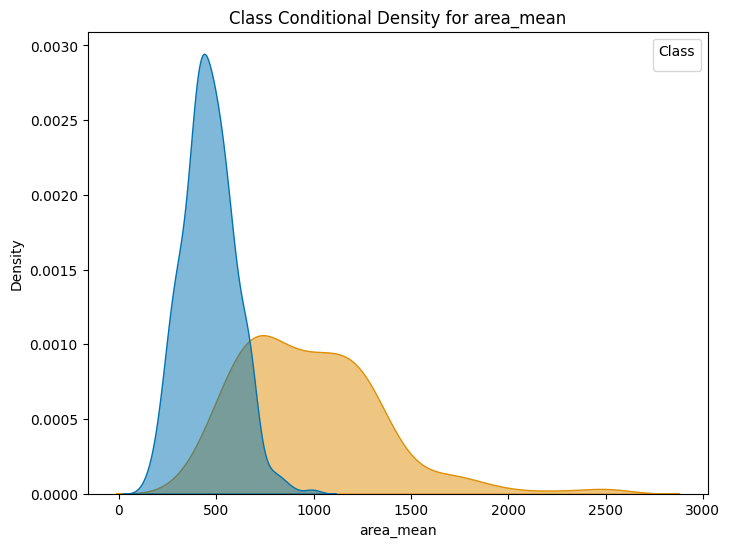

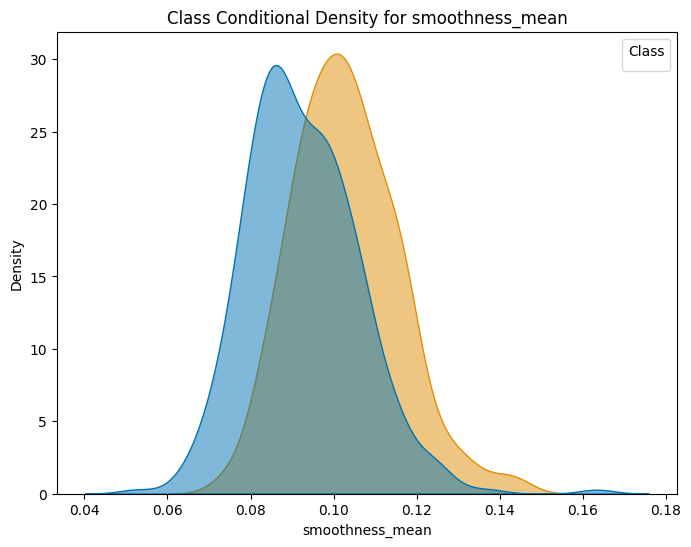

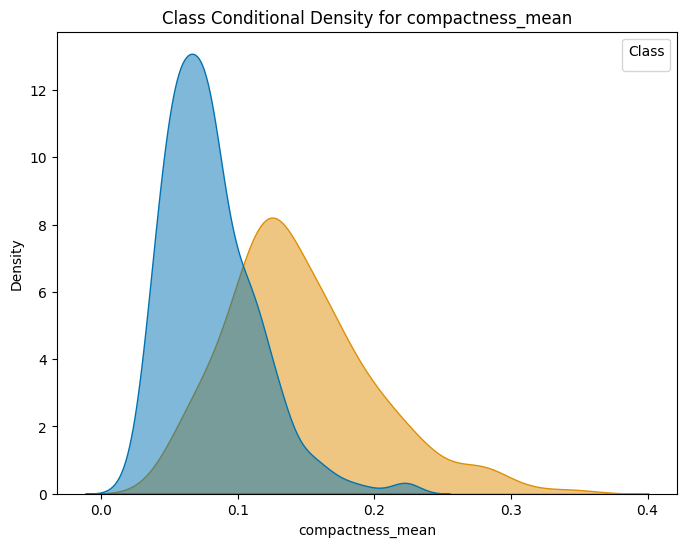

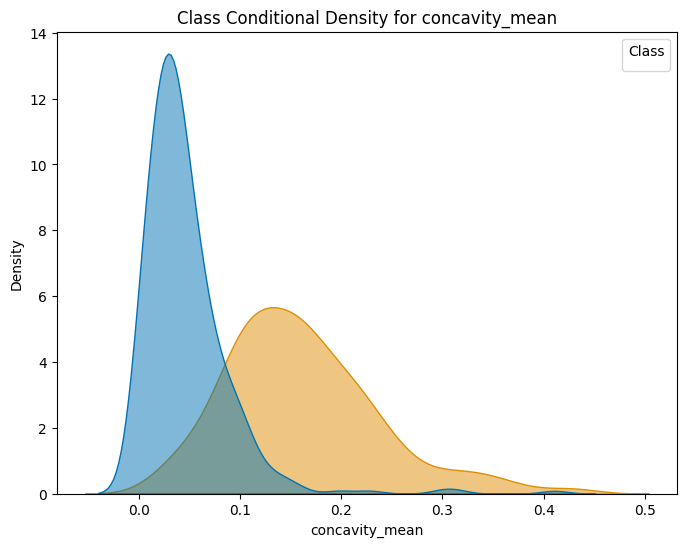

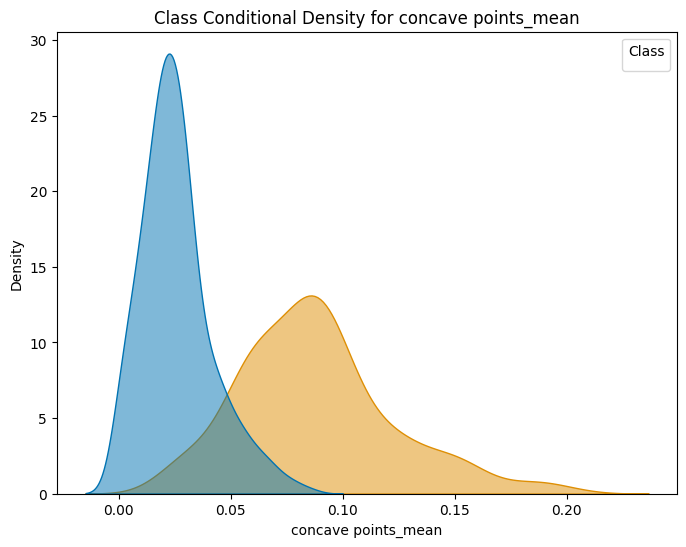

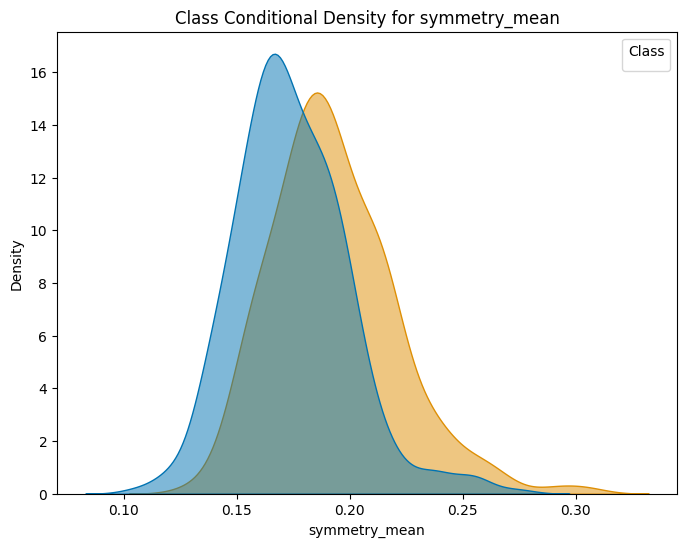

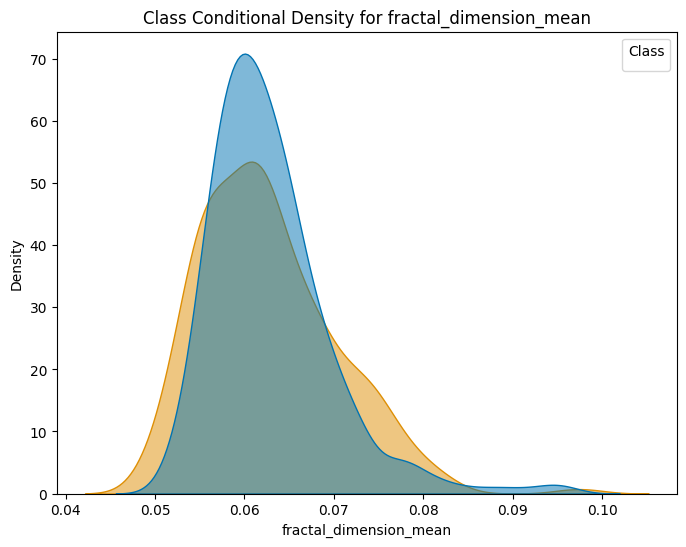

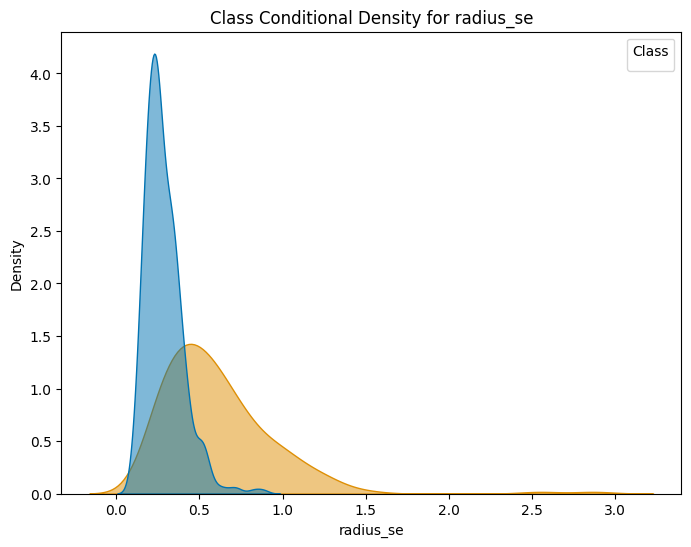

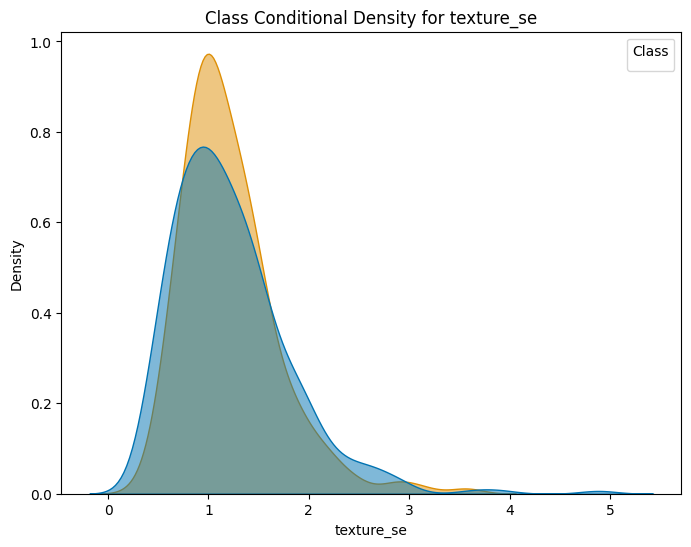

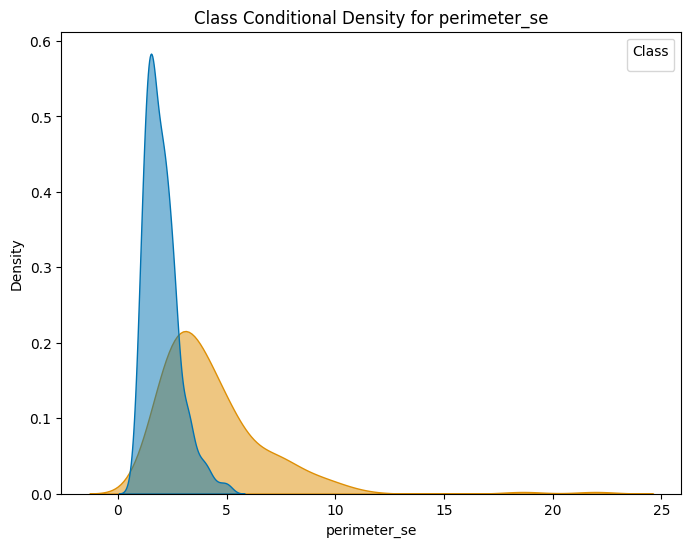

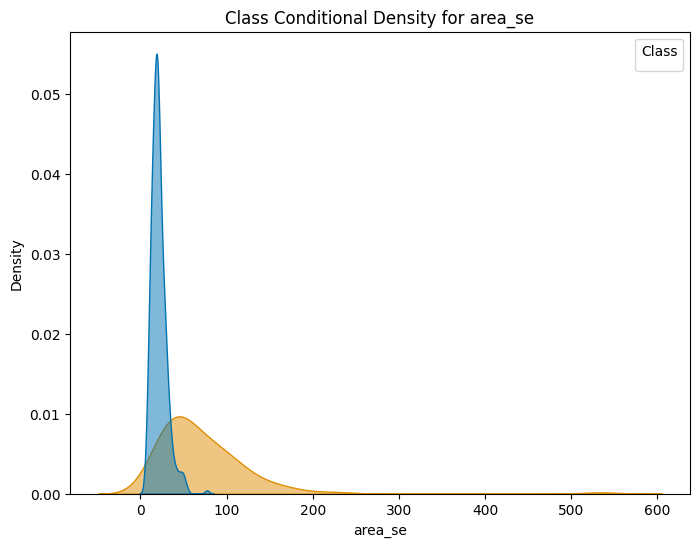

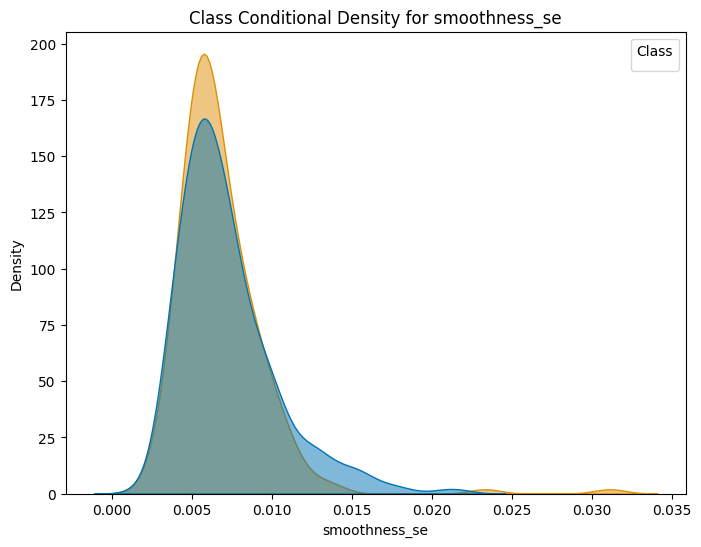

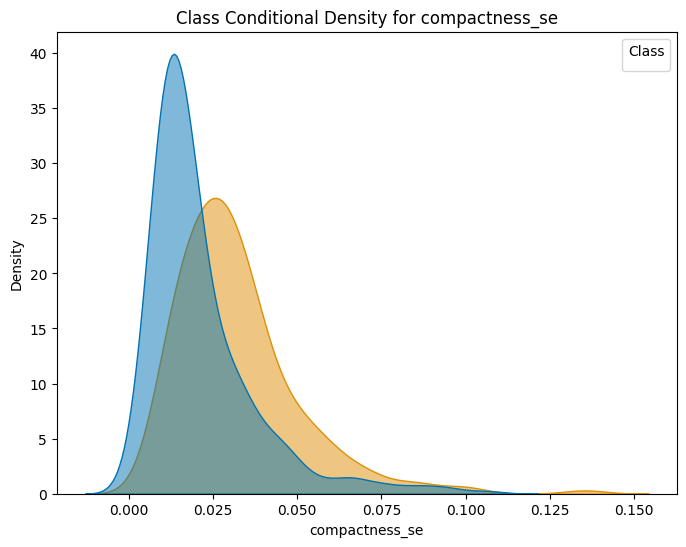

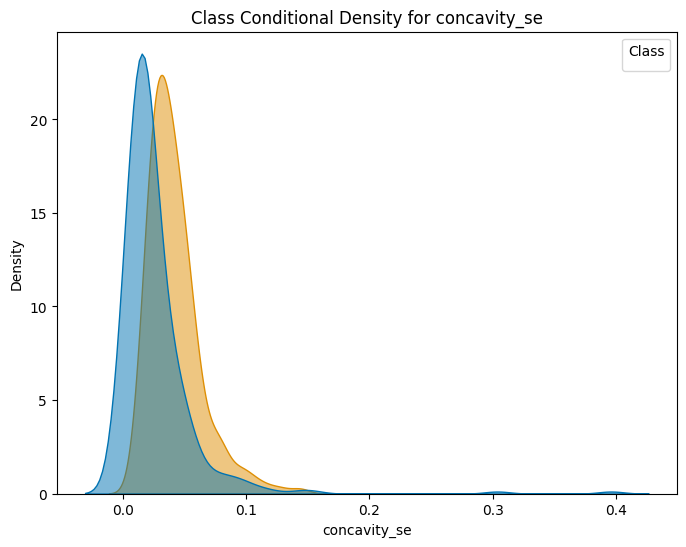

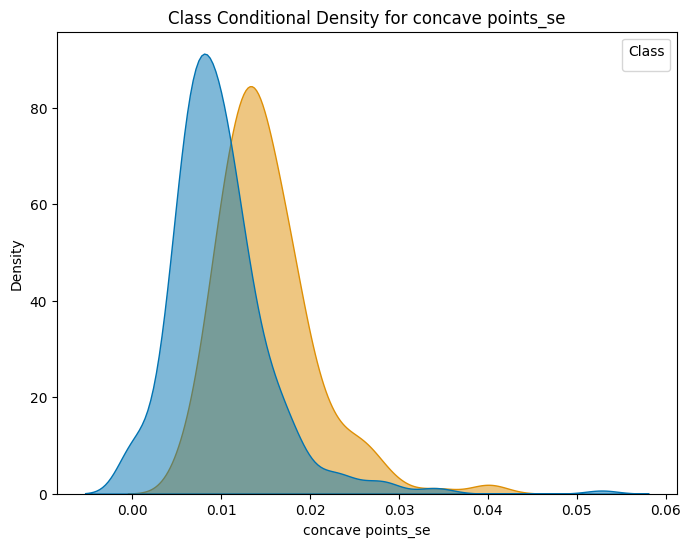

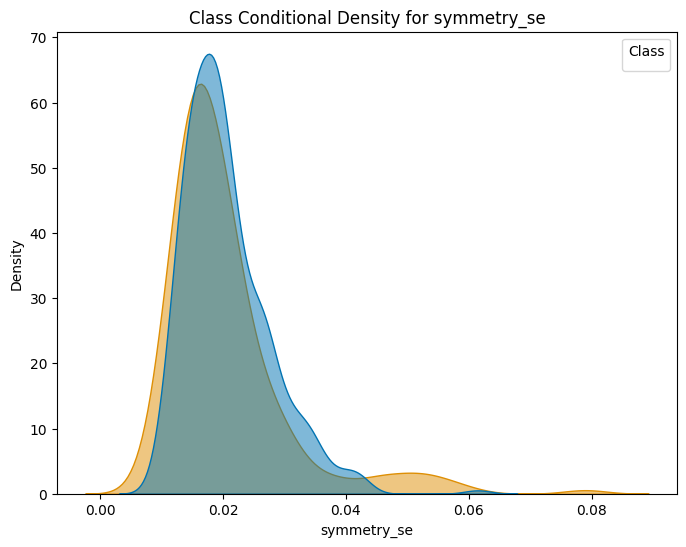

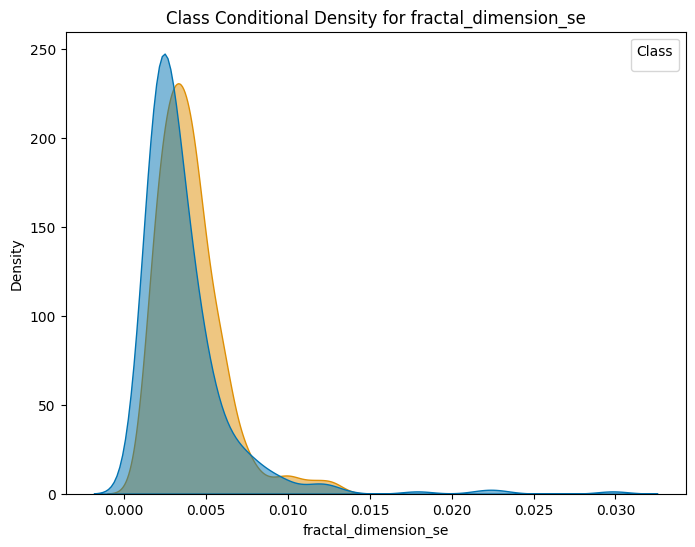

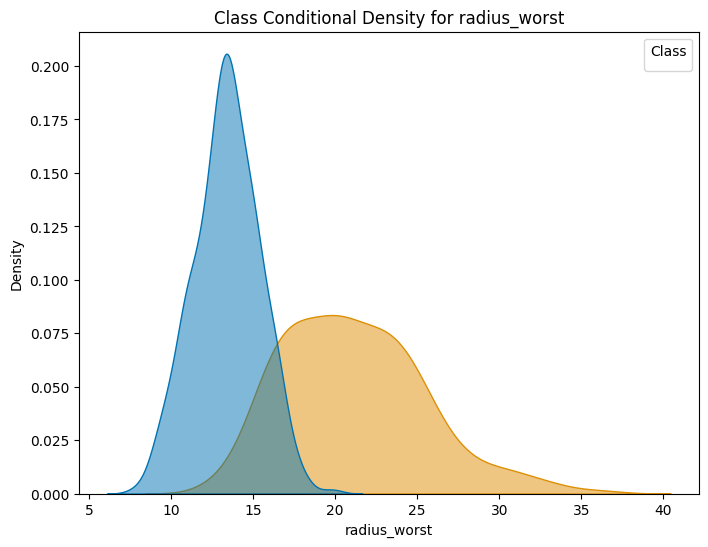

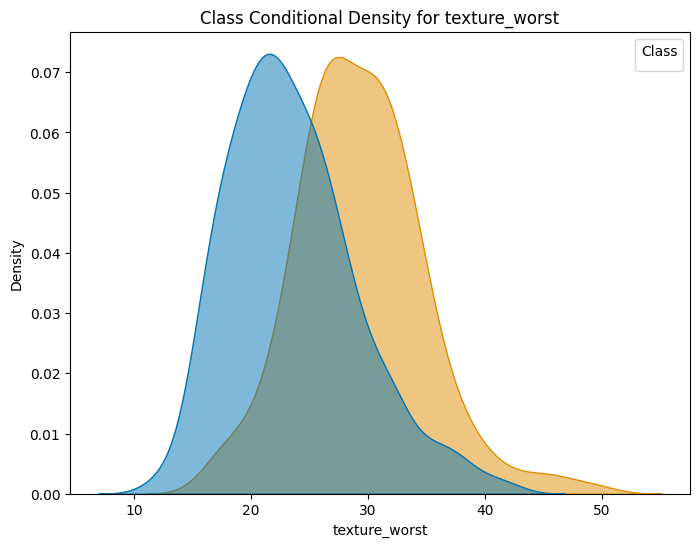

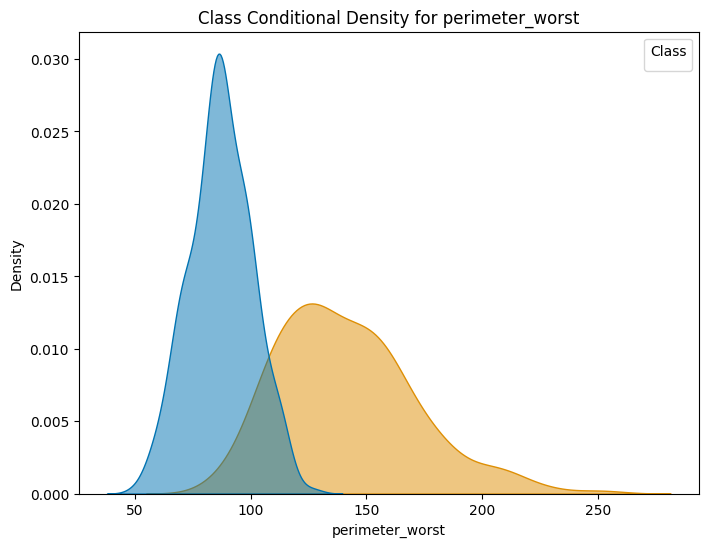

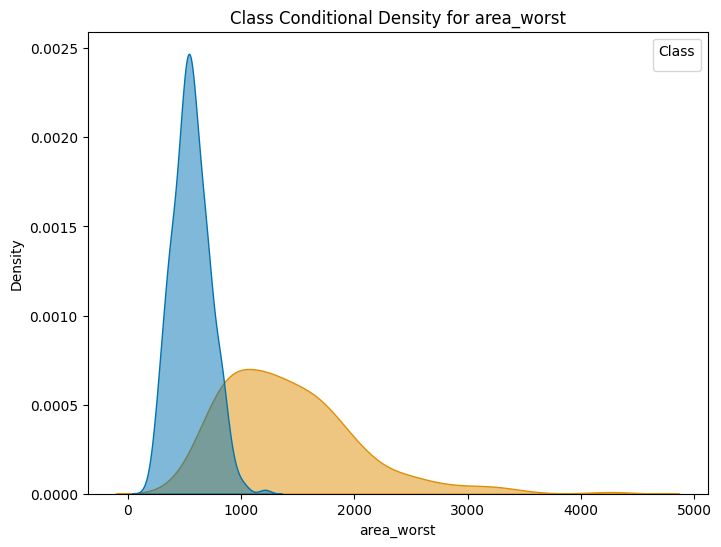

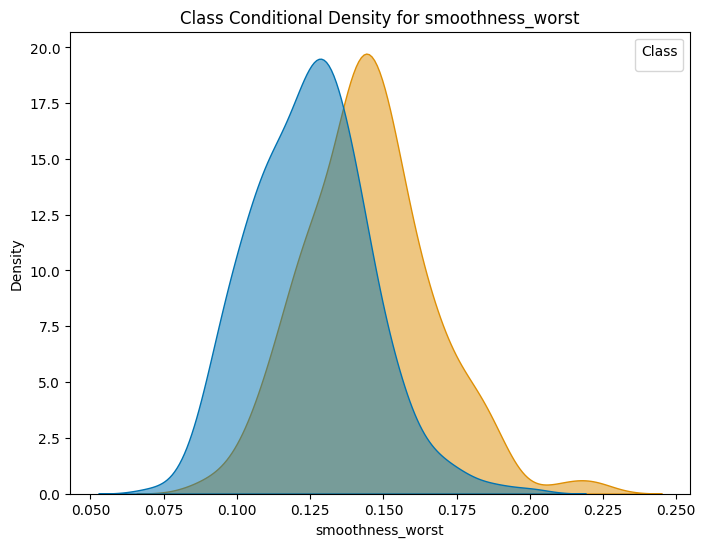

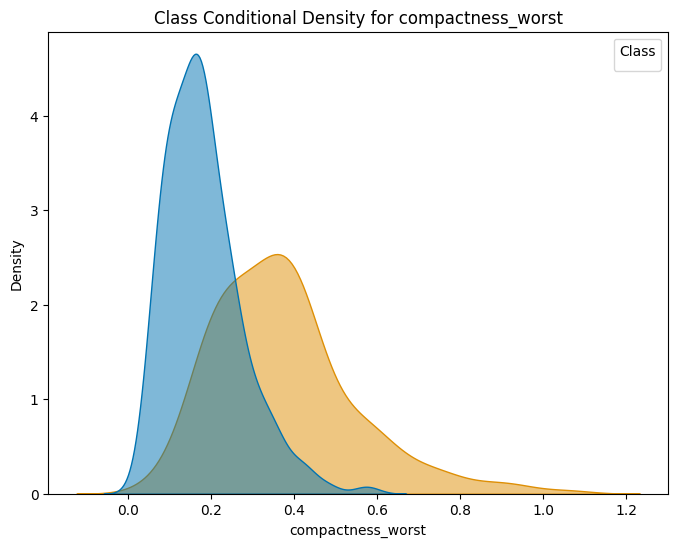

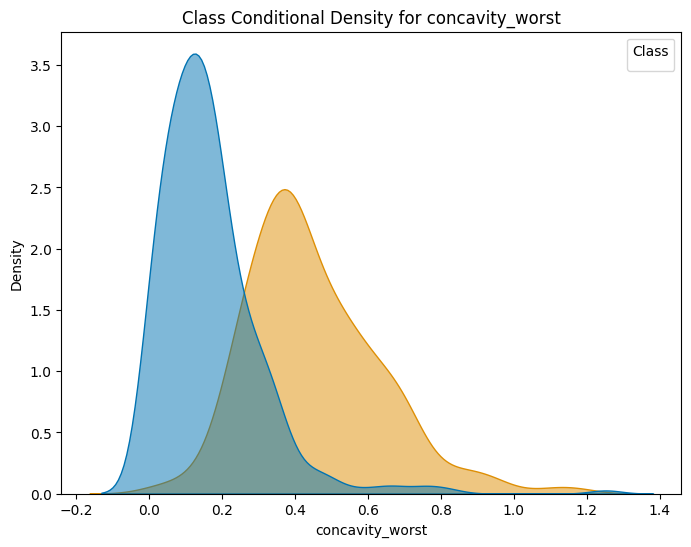

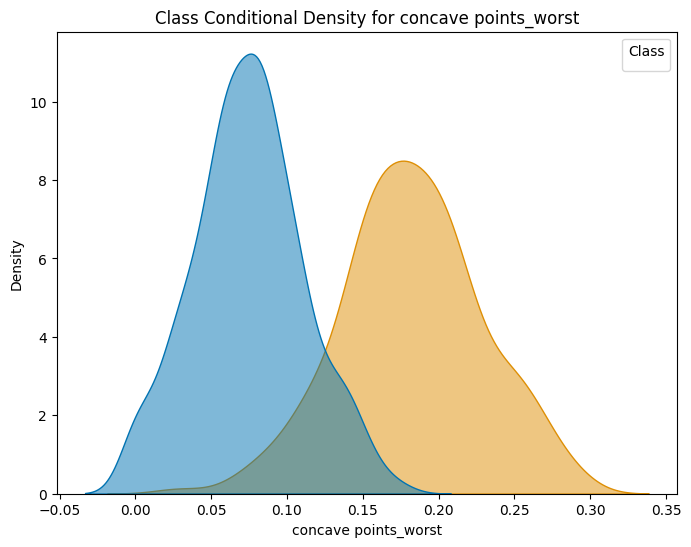

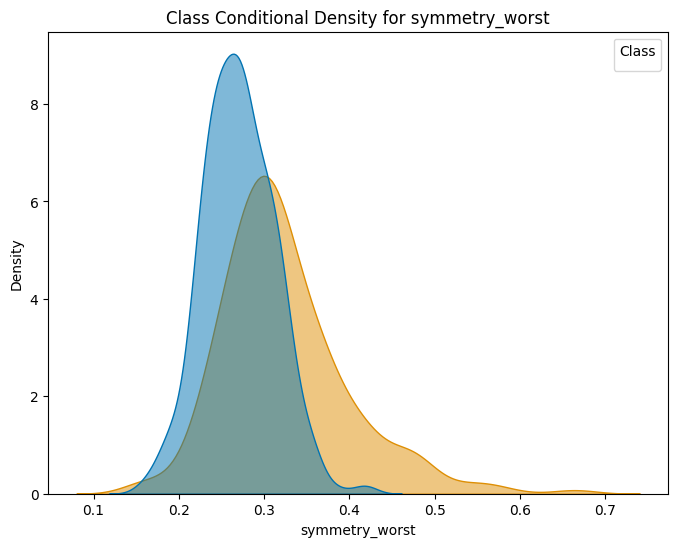

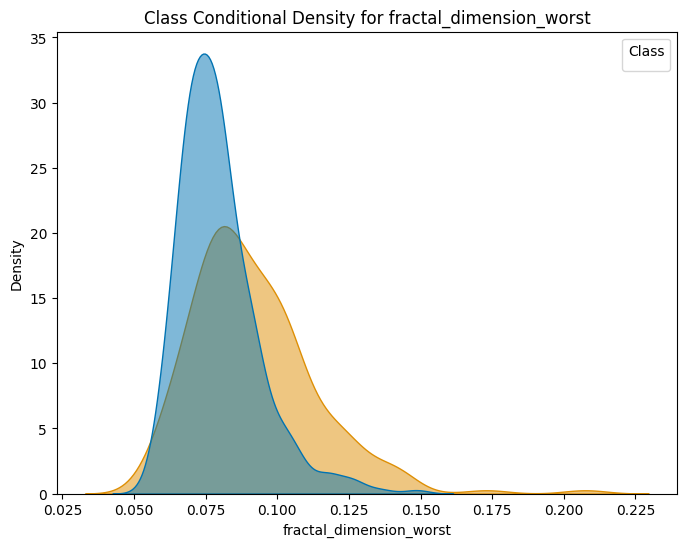

In [ ]:
feature_names = df.columns.tolist()

for feature in feature_names:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=feature, hue='diagnosis', fill=True, common_norm=False, alpha=0.5, palette='colorblind')
    plt.title(f'Class Conditional Density for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Class', loc='upper right')
    plt.show()

# Check for outliers

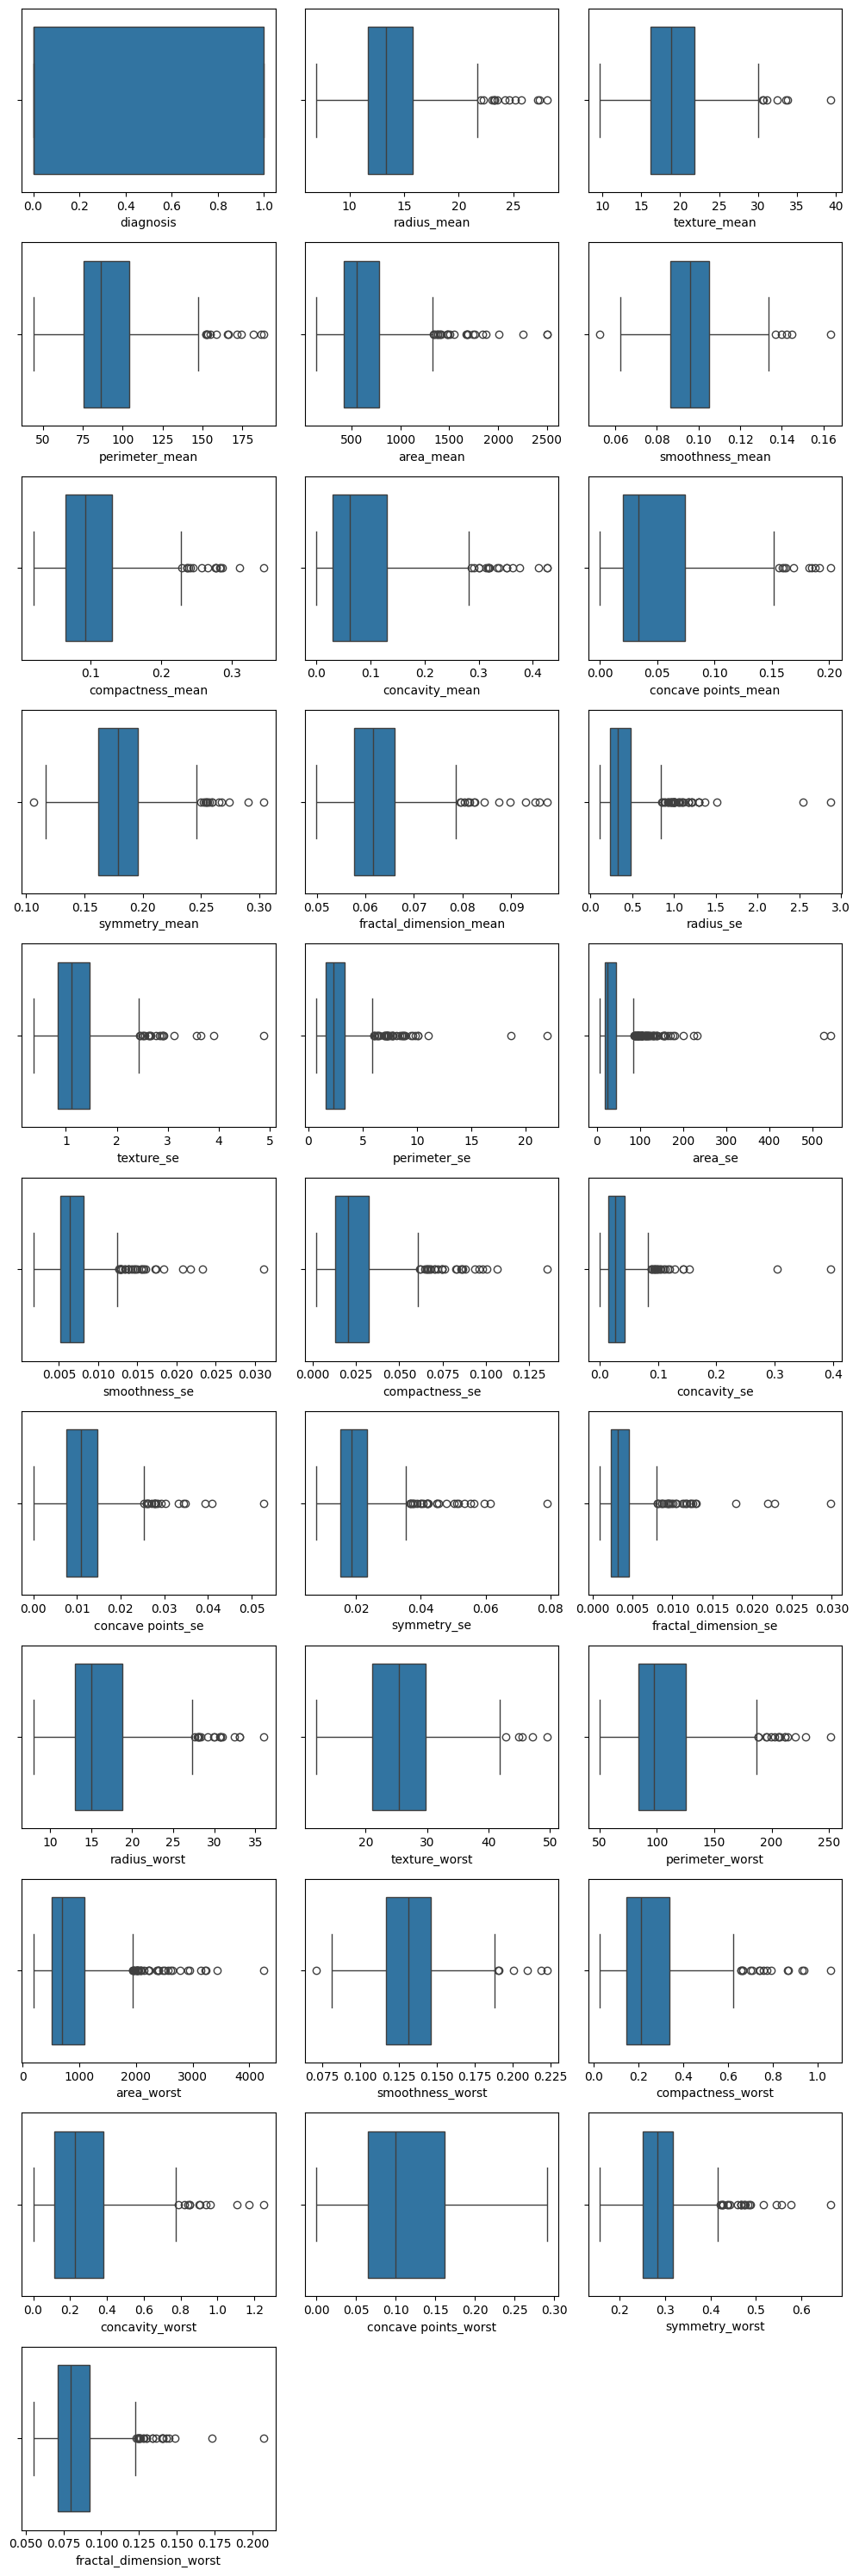

In [ ]:

plt.figure(figsize=(10, 30))  #

for i, col in enumerate(df.columns):
    plt.subplot(11, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)



In [ ]:
outliers.sum()

171

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

df_clean = df.drop(columns = ['diagnosis'])[~outliers]

print("Number of outliers removed:", outliers.sum())

print("Shape of cleaned DataFrame:", df_clean.shape)

Number of outliers removed: 171
Shape of cleaned DataFrame: (398, 30)


## PCA

In [ ]:

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

principal_components_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_components_df, y], axis=1)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.44272026 0.18971182]


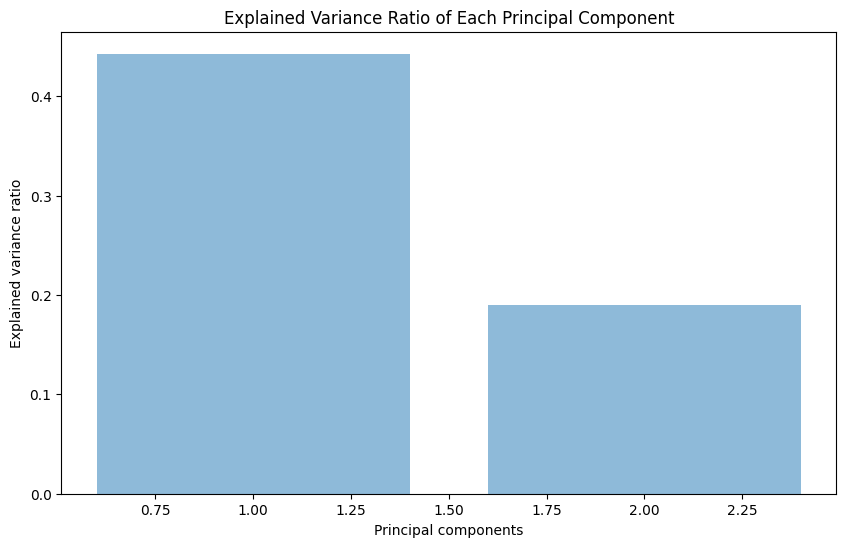

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 2 + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.show()

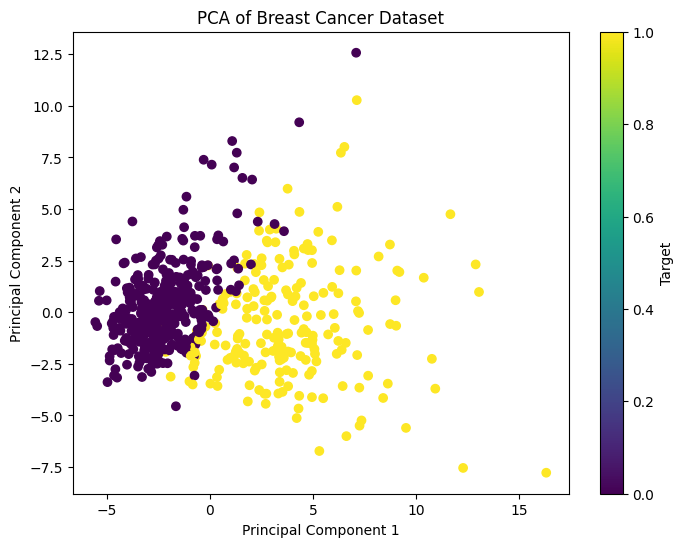

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['PC1'], final_df['PC2'], c=final_df['diagnosis'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Target')
plt.show()

In [ ]:
final_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1
...,...,...,...
564,6.439315,-3.576817,1
565,3.793382,-3.584048,1
566,1.256179,-1.902297,1
567,10.374794,1.672010,1


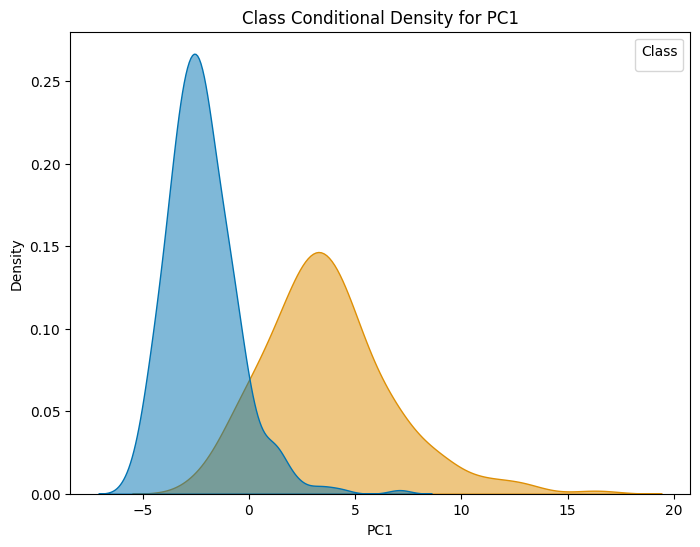

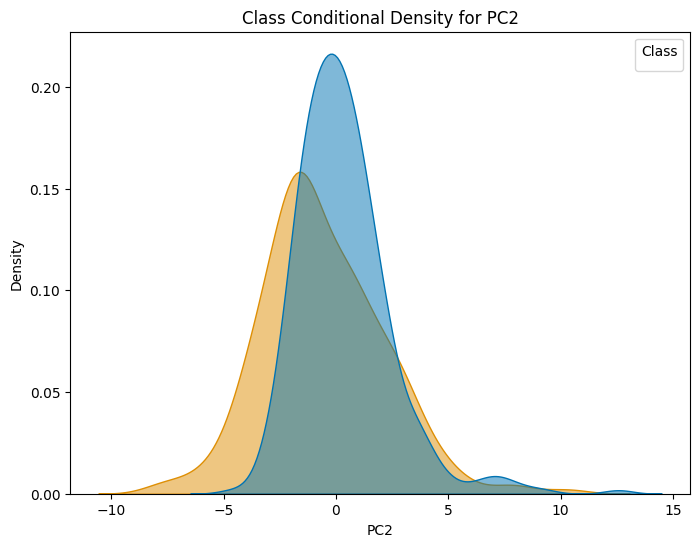

<ipython-input-20-4236b9561ad6>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=final_df, x=feature, hue='diagnosis', fill=True, common_norm=False, alpha=0.5, palette='colorblind')


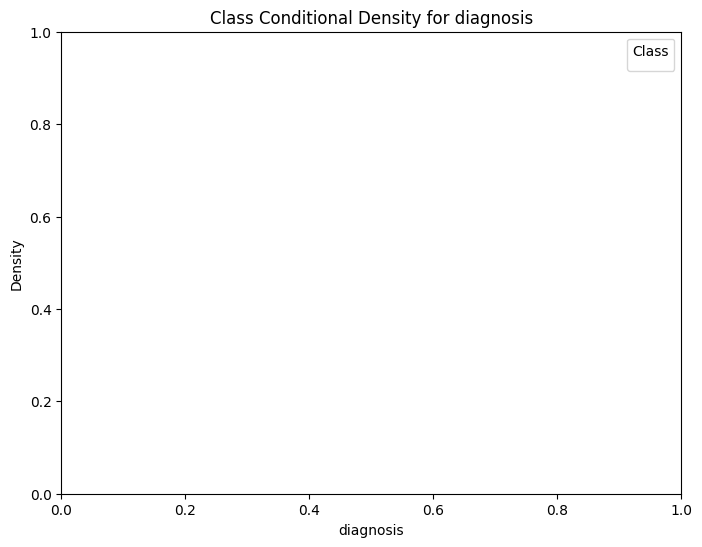

In [ ]:
feature_names = final_df.columns.tolist()

for feature in feature_names:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=final_df, x=feature, hue='diagnosis', fill=True, common_norm=False, alpha=0.5, palette='colorblind')
    plt.title(f'Class Conditional Density for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Class', loc='upper right')
    plt.show()

# Models


In [ ]:
X = final_df.drop(columns=['diagnosis'])
y = final_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)



GaussianNB()

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)


SVC()

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_classifier.predict(X_test))
print("Naïve Bayes Classifier Accuracy:", naive_bayes_accuracy)

knn_accuracy = accuracy_score(y_test, knn_classifier.predict(X_test))
print("KNN Classifier Accuracy:", knn_accuracy)

svm_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))
print("SVM Classifier Accuracy:", svm_accuracy)

dt_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))
print("Decision Tree Classifier Accuracy:", dt_accuracy)


Naïve Bayes Classifier Accuracy: 0.9473684210526315
KNN Classifier Accuracy: 0.9736842105263158
SVM Classifier Accuracy: 0.9649122807017544
Decision Tree Classifier Accuracy: 0.956140350877193


# Tuning Hyperparameters

**Grid Search for Naïve Bayes Classifier**





In [ ]:


naive_bayes_params = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]

}

naive_bayes_grid_search = GridSearchCV(GaussianNB(), naive_bayes_params, cv=5, scoring='accuracy')

naive_bayes_grid_search.fit(X_train, y_train)

best_naive_bayes_model = naive_bayes_grid_search.best_estimator_
naive_bayes_accuracy = accuracy_score(y_test, best_naive_bayes_model.predict(X_test))
print("Best Naïve Bayes Classifier Accuracy:", naive_bayes_accuracy)


Best Naïve Bayes Classifier Accuracy: 0.9649122807017544


In [ ]:
best_naive_bayes_model.get_params()

{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}

**Visualization of Naïve Bayes Accuracy with Changing var_smoothing**

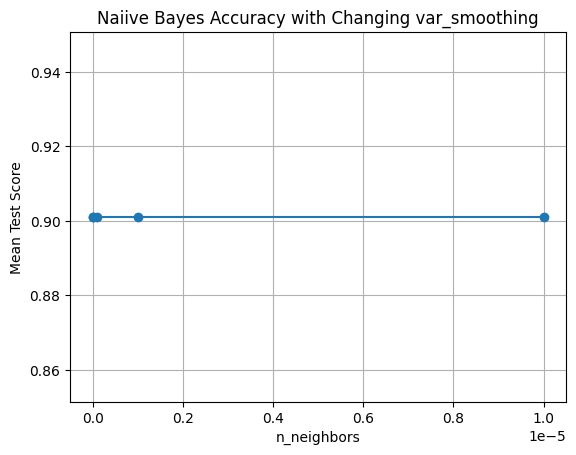

In [ ]:

results = naive_bayes_grid_search.cv_results_
n_neighbors_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('Naiive Bayes Accuracy with Changing var_smoothing')
plt.grid(True)
plt.show()

**Visualization of Naive Bayes Accuracy with Changing priors**

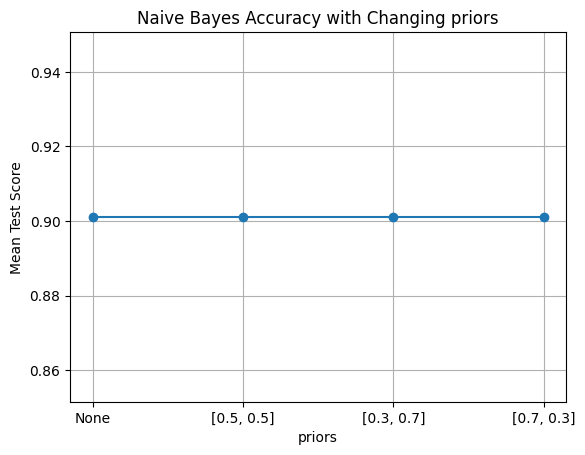

In [ ]:
results = naive_bayes_grid_search.cv_results_
priors_values = [str(prior) for prior in naive_bayes_params['priors']]
mean_test_scores = results['mean_test_score'][:len(priors_values)]
plt.figure()
plt.plot(priors_values, mean_test_scores, marker='o')
plt.xlabel('priors')
plt.ylabel('Mean Test Score')
plt.title('Naive Bayes Accuracy with Changing priors')
plt.grid(True)
plt.show()


**Grid Search for KNN Classifier**


In [ ]:

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=2, scoring='accuracy')

knn_grid_search.fit(X_train, y_train)

best_knn_model = knn_grid_search.best_estimator_

knn_accuracy = accuracy_score(y_test, best_knn_model.predict(X_test))
print("Best KNN Classifier Accuracy:", knn_accuracy)


Best KNN Classifier Accuracy: 0.9824561403508771


In [ ]:
np.array(['red', 'green', 'blue'])[y_train].shape

(455,)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


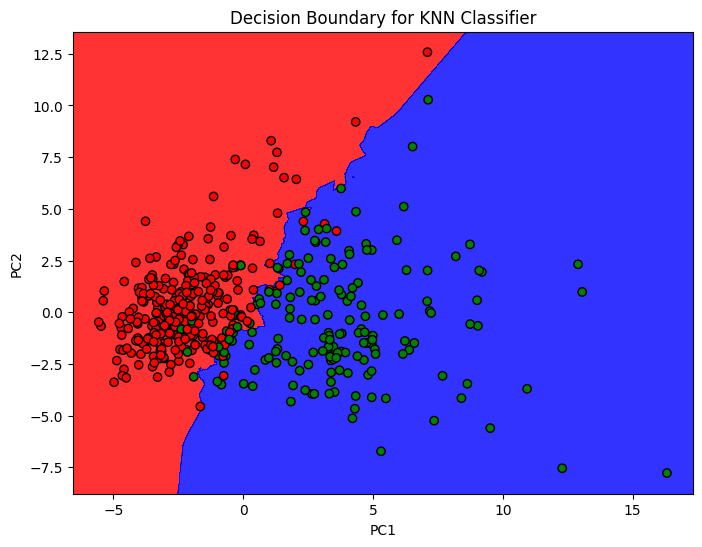

In [ ]:

X_train= X_train.values
y_train_colors = np.array(['red', 'green', 'blue'])[y_train]

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_colors, edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary for KNN Classifier')
plt.show()


In [ ]:
best_knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

**KNN Accuracy with Changing Algorithm**


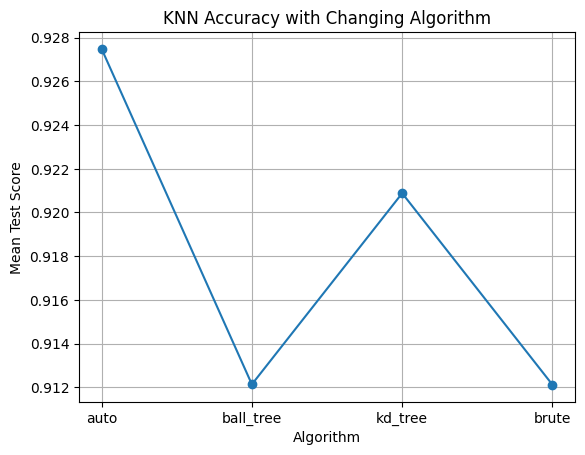

In [ ]:
results = knn_grid_search.cv_results_
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(algorithm_values, mean_test_scores[:len(algorithm_values)], marker='o')
plt.xlabel('Algorithm')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing Algorithm')
plt.grid(True)
plt.show()


**KNN Accuracy with Changing  Weights**



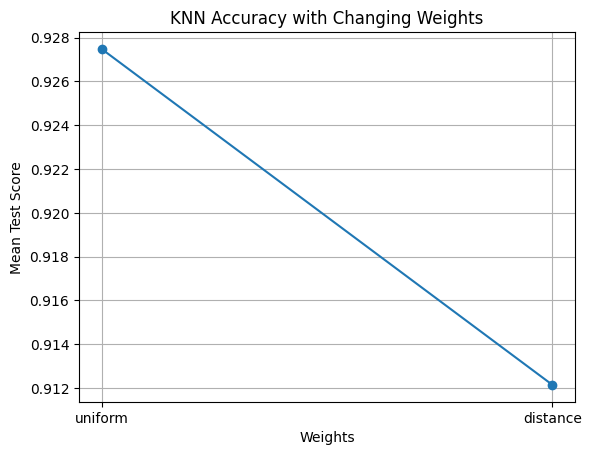

In [ ]:
results = knn_grid_search.cv_results_
weights_values = ['uniform', 'distance']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(weights_values, mean_test_scores[:len(weights_values)], marker='o')
plt.xlabel('Weights')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing Weights')
plt.grid(True)
plt.show()


**KNN Accuracy with Changing n_neighbors**

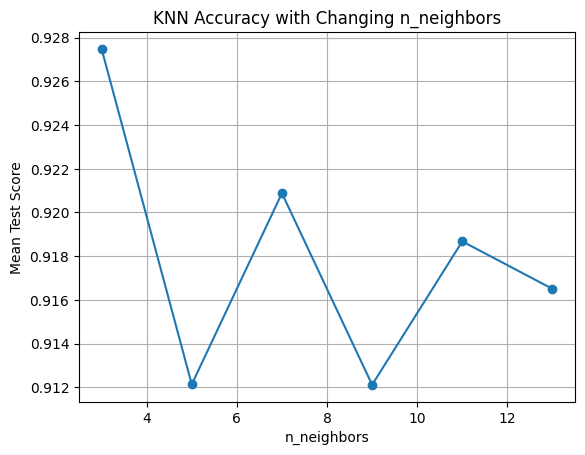

In [ ]:

results = knn_grid_search.cv_results_
n_neighbors_values = [3, 5, 7, 9, 11, 13]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(n_neighbors_values, mean_test_scores[:len(n_neighbors_values)], marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNN Accuracy with Changing n_neighbors')
plt.grid(True)
plt.show()

**Grid search for SVM**

In [ ]:

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}


svm_grid_search = GridSearchCV(estimator=SVC(), param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

best_svm_model = svm_grid_search.best_estimator_


svm_accuracy = accuracy_score(y_test, best_svm_model.predict(X_test))
print("Best SVM Classifier Accuracy:", svm_accuracy)


Best SVM Classifier Accuracy: 0.9912280701754386


In [ ]:
best_svm_model.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

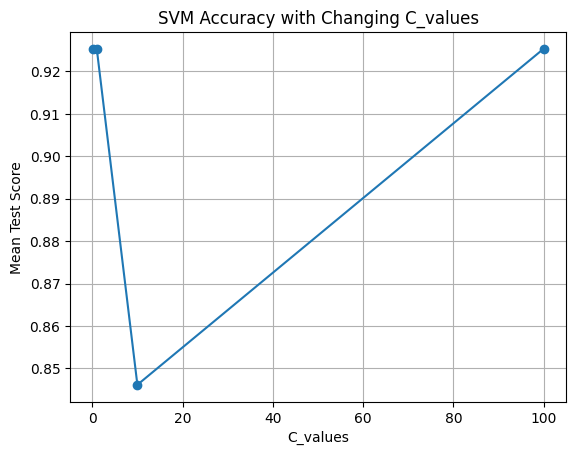

In [ ]:
results = svm_grid_search.cv_results_
C_values = [0.1, 1, 10, 100]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(C_values, mean_test_scores[:len(C_values)], marker='o')
plt.xlabel('C_values')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing C_values')
plt.grid(True)
plt.show()

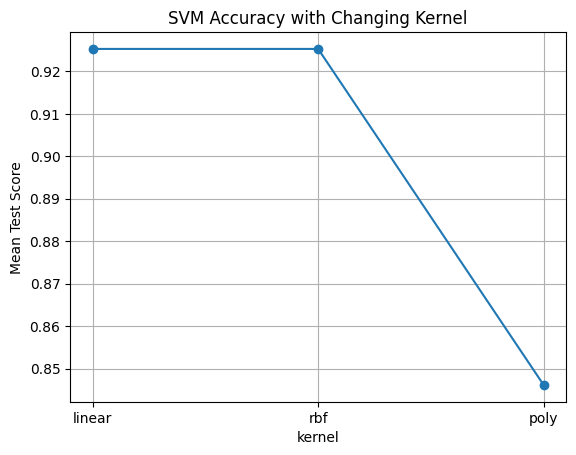

In [ ]:
results = svm_grid_search.cv_results_
kernel = ['linear', 'rbf', 'poly']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(kernel, mean_test_scores[:len(kernel)], marker='o')
plt.xlabel('kernel')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing Kernel')
plt.grid(True)
plt.show()


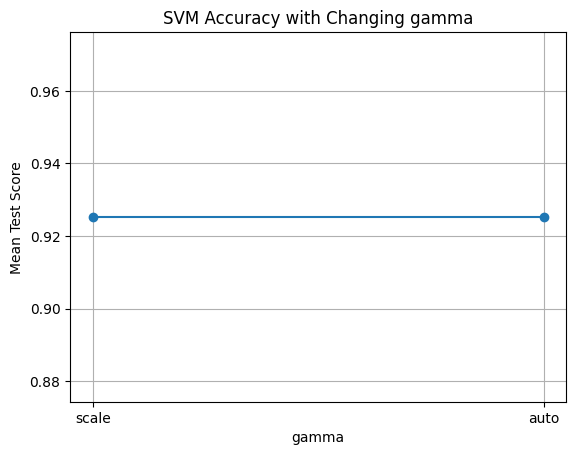

In [ ]:
results = svm_grid_search.cv_results_
gamma = ['scale', 'auto']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(gamma, mean_test_scores[:len(gamma)], marker='o')
plt.xlabel('gamma')
plt.ylabel('Mean Test Score')
plt.title('SVM Accuracy with Changing gamma')
plt.grid(True)
plt.show()


**Grid search for Decision Tree**

In [ ]:

decision_tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5, scoring='accuracy')
decision_tree_grid_search.fit(X_train, y_train)


best_decision_tree_model = decision_tree_grid_search.best_estimator_

decision_tree_accuracy = accuracy_score(y_test, best_decision_tree_model.predict(X_test))
print("Best Decision Tree Classifier Accuracy:", decision_tree_accuracy)



Best Decision Tree Classifier Accuracy: 0.9736842105263158


In [ ]:

 best_decision_tree_model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

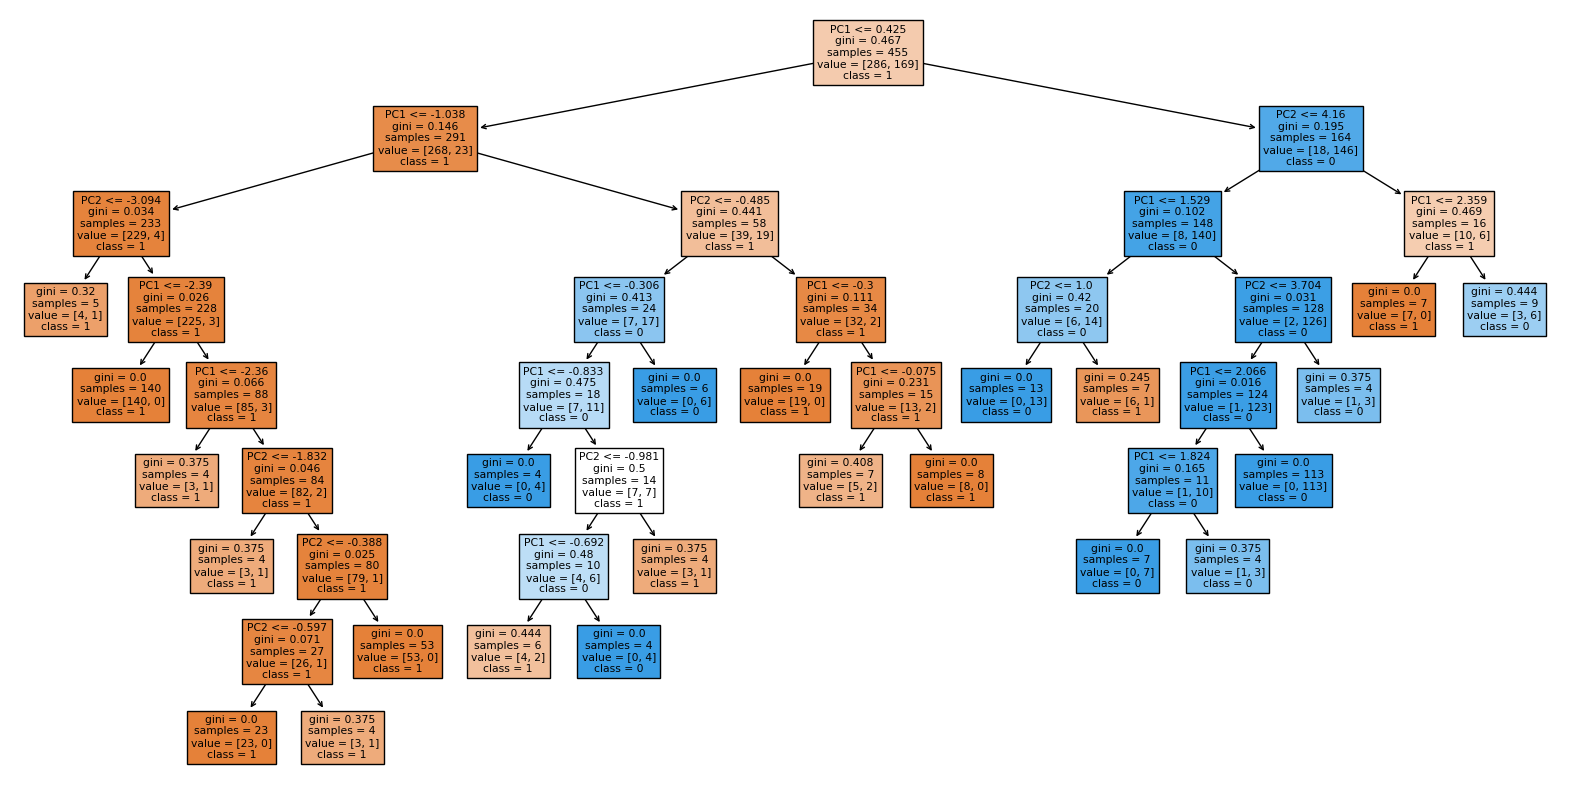

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = best_decision_tree_model


feature_names = final_df.columns[:-1]
class_names = final_df['diagnosis'].astype(str).unique()

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()


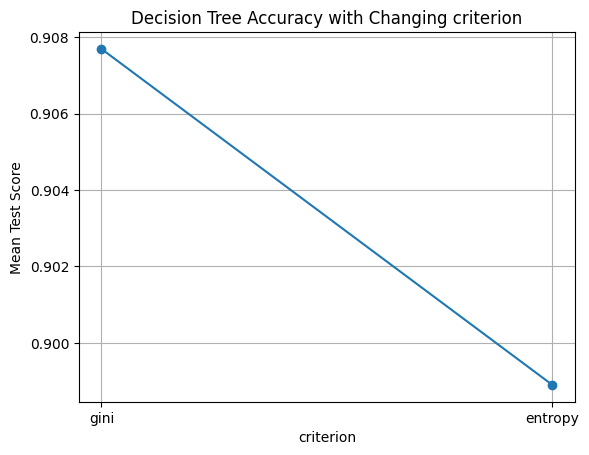

In [ ]:
results = decision_tree_grid_search.cv_results_
criterion = ['gini', 'entropy']
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(criterion, mean_test_scores[:len(criterion)], marker='o')
plt.xlabel('criterion')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing criterion')
plt.grid(True)
plt.show()


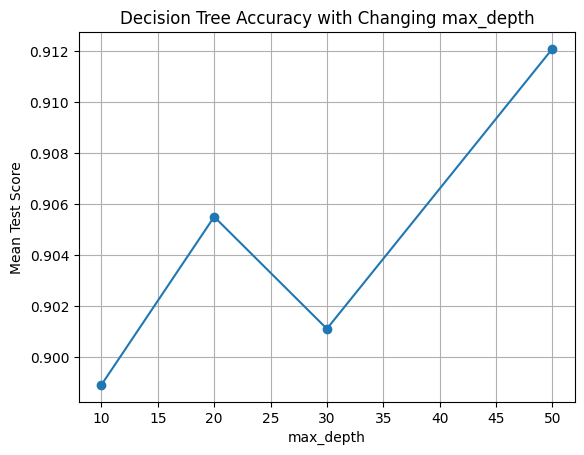

In [ ]:
results = decision_tree_grid_search.cv_results_
max_depth = [None, 10, 20, 30, 50]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(max_depth, mean_test_scores[:len(max_depth)], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing max_depth')
plt.grid(True)
plt.show()


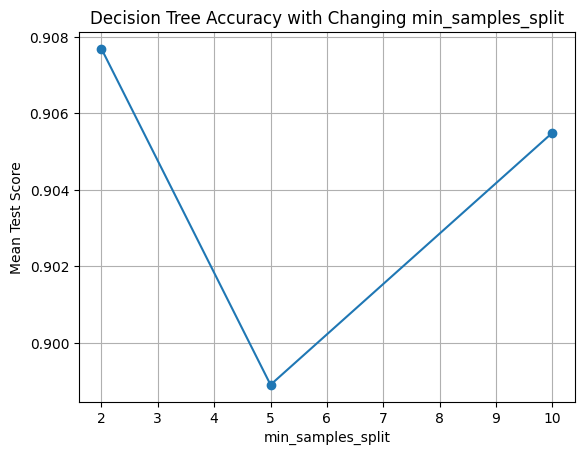

In [ ]:
results = decision_tree_grid_search.cv_results_
min_samples_split = [2, 5, 10]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(min_samples_split, mean_test_scores[:len(min_samples_split)], marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing min_samples_split')
plt.grid(True)
plt.show()


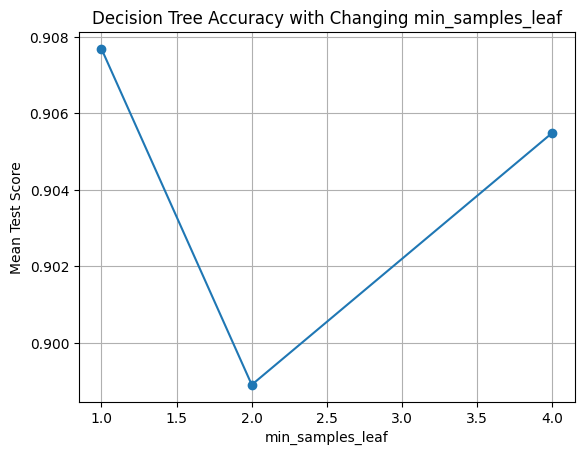

In [ ]:
results = decision_tree_grid_search.cv_results_
min_samples_leaf = [1, 2, 4]
mean_test_scores = results['mean_test_score']
plt.figure()
plt.plot(min_samples_leaf, mean_test_scores[:len(min_samples_leaf)], marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Accuracy with Changing min_samples_leaf')
plt.grid(True)
plt.show()


**Visualization of Confusion Matrices**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


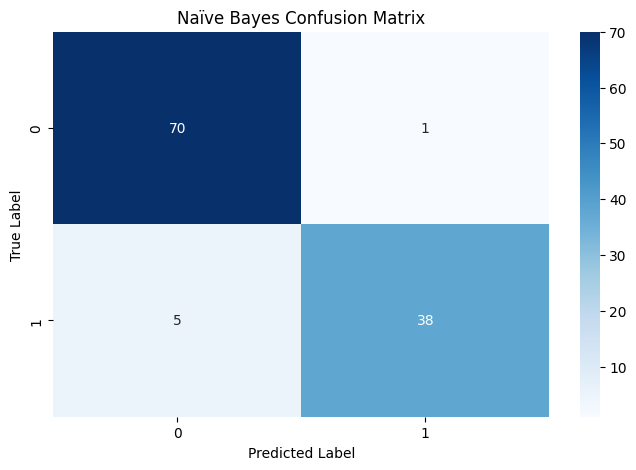

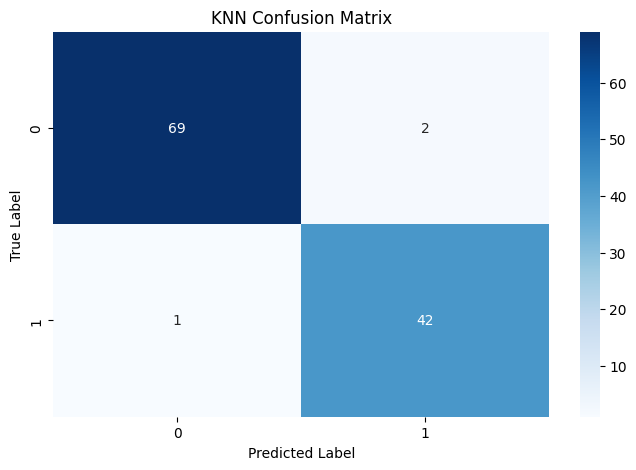

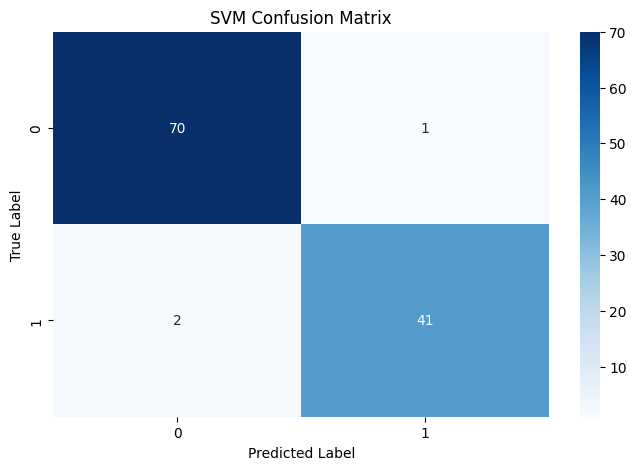

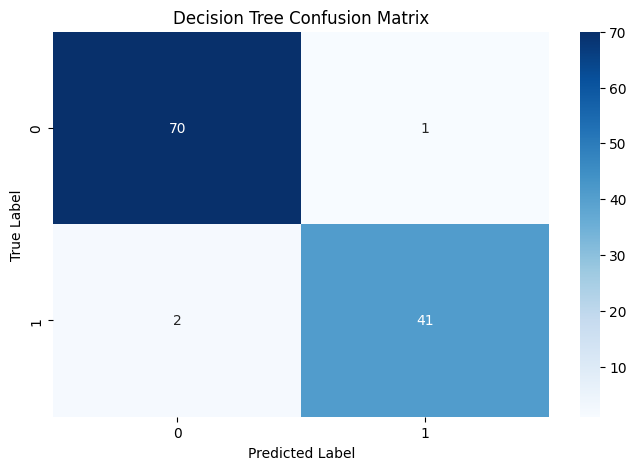

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


naive_bayes_pred = naive_bayes_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)
svm_pred = best_svm_model.predict(X_test)
decision_tree_pred = best_decision_tree_model.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for all classifiers
plot_confusion_matrix(y_test, naive_bayes_pred, "Naïve Bayes Confusion Matrix")
plot_confusion_matrix(y_test, knn_pred, "KNN Confusion Matrix")
plot_confusion_matrix(y_test, svm_pred, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, decision_tree_pred, "Decision Tree Confusion Matrix")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


nb_probs = best_naive_bayes_model.predict_proba(X_test)[:, 1]
knn_probs = knn_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
svm_scores = best_svm_model.decision_function(X_test)
svm_probs = 1 / (1 + np.exp(-svm_scores))
dt_probs = best_decision_tree_model.predict_proba(X_test)[:, 1]


nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_roc_auc = auc(nb_fpr, nb_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_roc_auc = auc(dt_fpr, dt_tpr)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


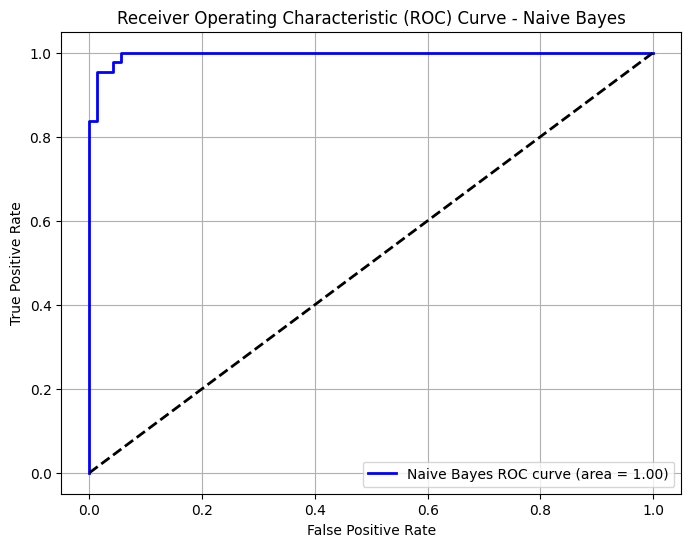

In [ ]:

# Plot ROC curve for Naive Bayes model
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


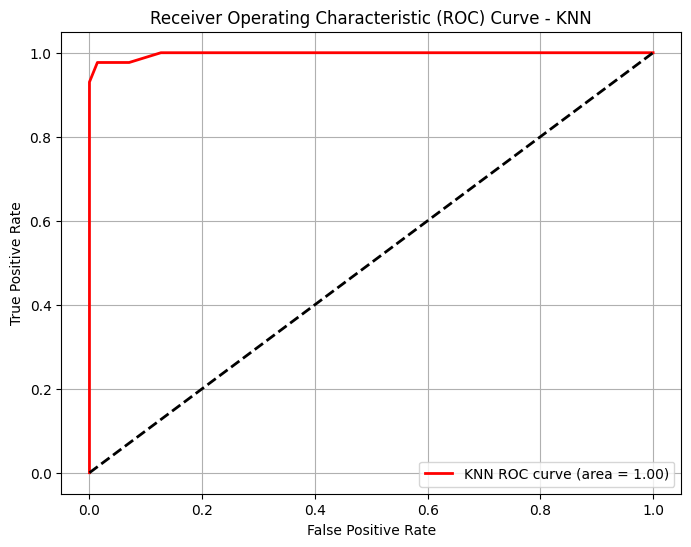

In [ ]:

# Plot ROC curve for KNN model
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='red', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


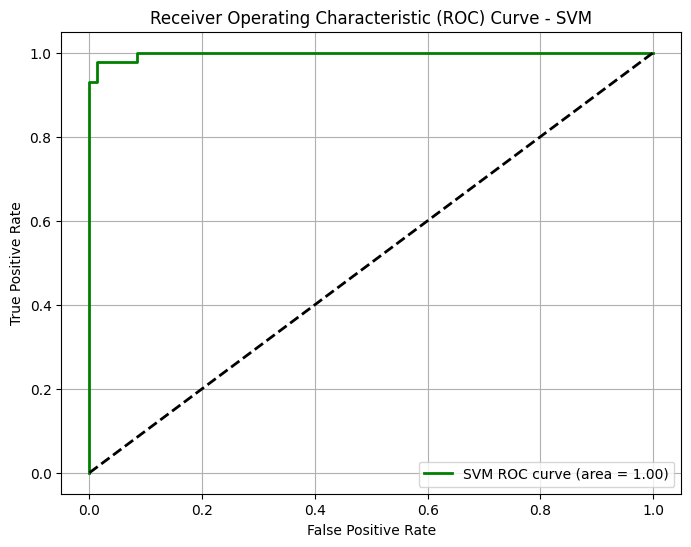

In [ ]:
# Plot ROC curve for SVM model
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



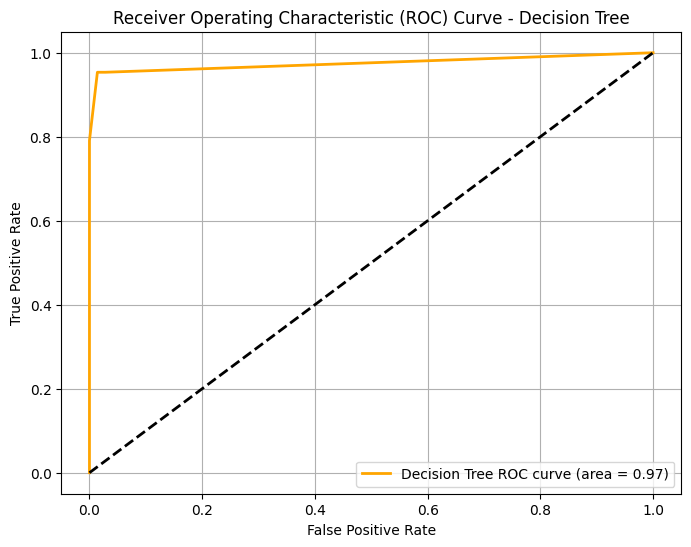

In [ ]:
# Plot ROC curve for Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, color='orange', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Classification Report for Naïve Bayes Classifier**

In [ ]:

print(classification_report(y_test, naive_bayes_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



**Classification Report for KNN Classifier**

In [ ]:
print(classification_report(y_test, knn_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Classification Report for SVM Classifier**

In [ ]:

svm_classification_report = classification_report(y_test, svm_pred)
print("Classification Report for SVM Classifier:")
print(svm_classification_report)


Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




**Classification Report for Decision Tree Classifier**

In [ ]:


decision_tree_classification_report = classification_report(y_test, decision_tree_pred)
print("\nClassification Report for Decision Tree Classifier:")
print(decision_tree_classification_report)



Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# MLP

**load and preprocess the data**

In [ ]:
X = final_df.drop(columns=['diagnosis'])
y = final_df['diagnosis']
# Assuming you have already preprocessed the data and obtained X and y
# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**build and train the MLP model**

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)


**TRAINING HISTORY**

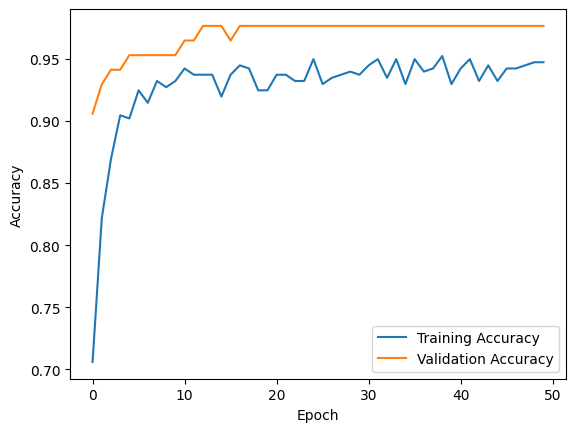

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Accuracies**

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9651162624359131


# Tuning Hyperparameters

In [ ]:

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}


grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=3, verbose=2, n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


**Results After Tuning**

In [ ]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

**Accuracy of Best Hyber parameters**

In [ ]:

best_model = MLPClassifier(random_state=42, **best_params)


best_model.fit(X_train, y_train)


test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)


Test Accuracy with Best Parameters: 0.9651162790697675


**Confusion Matrix**

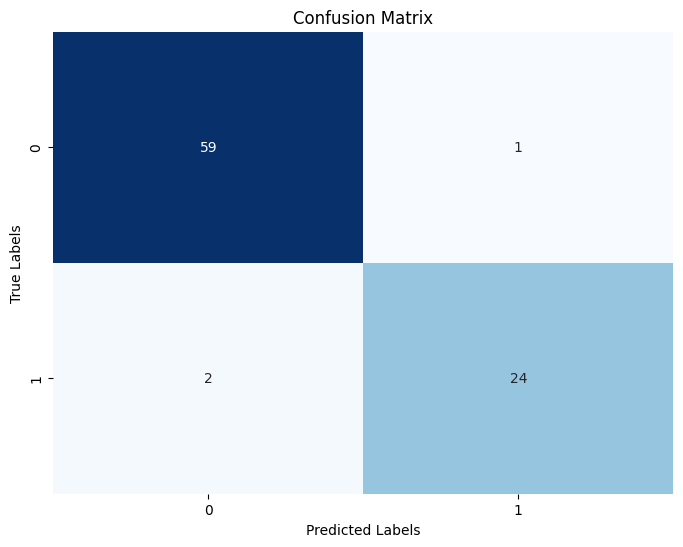

In [ ]:


y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**ROC Curve**

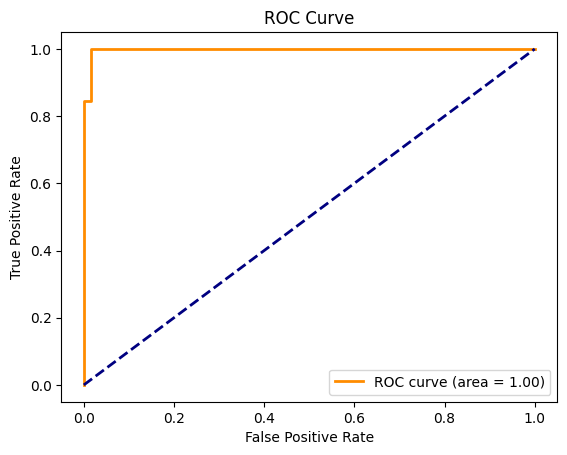

In [ ]:

# ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Classification Report for MLP**


In [ ]:
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.98      0.98        60
   Malignant       0.96      0.92      0.94        26

    accuracy                           0.97        86
   macro avg       0.96      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86

